In [1]:
from scrapers.hh_ru_scraper import scrape
from preprocess import preprocess

In [2]:
raw_tags_path = 'data/scraped_test.json'
processed_tags_path = 'data/processed_test.json'

In [8]:
# scrape tags from hh.ru and save results
raw_tags_list = scrape("YOLO", save_path=raw_tags_path)

scraping page 1
46182095
Python OpenCV C++ Tensorflow YoLo3+ Машинное обучение Machine Learning Computer Vision

46301620
Python Linux C++ CV AI Computer Vision Deep Learning

46182094
Python OpenCV C++ Tensorflow YoLo3+ Машинное обучение Machine Learning Computer Vision

46233234
Python Tensorflow OpenCV C++ C/C++

44410393
C/C++ Linux Пользователь ПК Точность и внимательность к деталям

46857375
Python PyTorch Numpy Tensorflow Faiss MXNet PSPNet ResNet YOLO

46182093
Python OpenCV C++ Tensorflow YoLo3+ Машинное обучение Machine Learning Computer Vision

46182096
Python OpenCV C++ Tensorflow YoLo3+ Машинное обучение Machine Learning Computer Vision

46412204
Python CUDA OpenCV C++ нейросети Computer Vision Yolo ML

40558689
Python Agile Project Management machine learning data science Pandas PyTorch RecSys

46474537
Python Git Английский язык C++ Linux Pytorch OpenCV Computer Vision AI ML DL



In [9]:
raw_tags_list

[['Python',
  'OpenCV',
  'C++',
  'Tensorflow',
  'YoLo3+',
  'Машинное обучение',
  'Machine Learning',
  'Computer Vision'],
 ['Python', 'Linux', 'C++', 'CV', 'AI', 'Computer Vision', 'Deep Learning'],
 ['Python',
  'OpenCV',
  'C++',
  'Tensorflow',
  'YoLo3+',
  'Машинное обучение',
  'Machine Learning',
  'Computer Vision'],
 ['Python', 'Tensorflow', 'OpenCV', 'C++', 'C/C++'],
 ['C/C++', 'Linux', 'Пользователь ПК', 'Точность и внимательность к деталям'],
 ['Python',
  'PyTorch',
  'Numpy',
  'Tensorflow',
  'Faiss',
  'MXNet',
  'PSPNet',
  'ResNet',
  'YOLO'],
 ['Python',
  'OpenCV',
  'C++',
  'Tensorflow',
  'YoLo3+',
  'Машинное обучение',
  'Machine Learning',
  'Computer Vision'],
 ['Python',
  'OpenCV',
  'C++',
  'Tensorflow',
  'YoLo3+',
  'Машинное обучение',
  'Machine Learning',
  'Computer Vision'],
 ['Python',
  'CUDA',
  'OpenCV',
  'C++',
  'нейросети',
  'Computer Vision',
  'Yolo',
  'ML'],
 ['Python',
  'Agile Project Management',
  'machine learning',
  'data 

In [10]:
# preprocess tags for visualization and save results
links = preprocess(raw_tags_path, processed_tags_path, node_size_thresh=1)

2021-08-12 13:04:20.314179 YOLO 11
Number of unique nodes: 32
Len nodes dict >= 1: 32
phrase: YOLO
vacancies parced: 11


### Example of static graph visualization

In [11]:
# pip install networkx

['python', 'opencv', 'c++', 'tensorflow', 'yolo3+', 'машинное обучение', 'machine learning', 'computer vision', 'linux', 'cv', 'ai', 'deep learning', 'c/c++', 'пользователь пк', 'точность и внимательность к деталям', 'pytorch', 'numpy', 'faiss', 'mxnet', 'pspnet', 'resnet', 'yolo', 'cuda', 'нейросети', 'ml', 'agile project management', 'data science', 'pandas', 'recsys', 'git', 'английский язык', 'dl']
[58, 36, 40, 30, 14, 14, 24, 38, 30, 12, 24, 12, 14, 6, 6, 44, 16, 16, 16, 16, 16, 28, 14, 14, 26, 12, 12, 12, 12, 20, 20, 20]


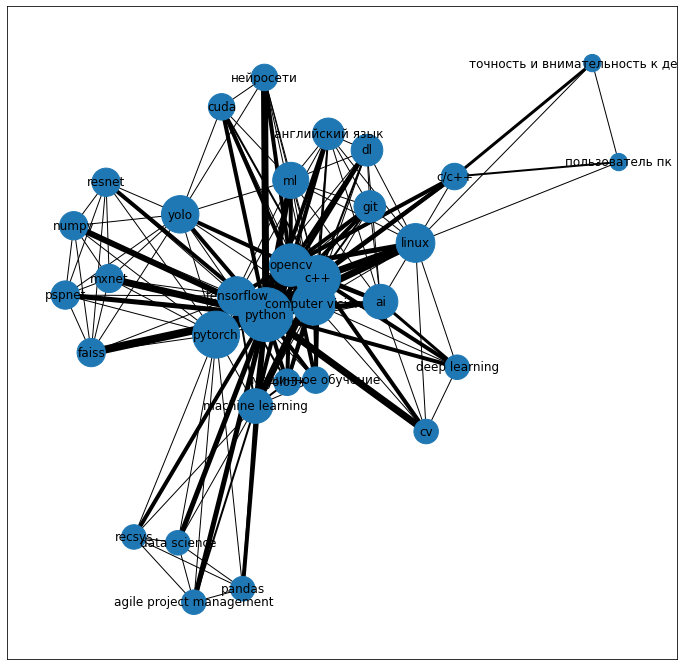

In [12]:
import matplotlib.pyplot as plt
import networkx as nx

"""
#Raw scraped tags look like this:

Python SQL
Python PostgreSQL MongoDB C/C++
Python PostgreSQL C/C++
Python SQL Linux Git Bash
Python PostgreSQL Bash Django Git
Python SQL PostgreSQL MongoDB
Python MongoDB

# After preprocessing tags look like this:
weighted_pairs = [("python", "SQL", 2),
                  ("python", "PostgreSQL", 4),
                  ("python", "python", 4),
                  ("python", "MongoDB", 3),
                  ("python", "C/C++", 2),
                  ("python", "Linux", 4),
                  ("python", "Git", 2),
                  ("python", "Bash", 2),
                  ("python", "Django", 1),
                  ("PostgreSQL", "MongoDB", 2),
                  ("PostgreSQL", "C/C++", 2),
                  ("PostgreSQL", "Bash", 1),
                  ("PostgreSQL", "Django", 1),
                  ("PostgreSQL", "Git", 1),
                  ("PostgreSQL", "SQL", 1),
                  ("MongoDB", "C/C++", 1),
                  ("MongoDB", "SQL", 1),
                  ("MongoDB", "C/C++", 1),
                  ("SQL", "Linux", 1),
                  ("SQL", "Git", 1),
                  ("SQL", "Bash", 1),
                  ("Git", "Linux", 1),
                  ("Git", "Bash", 1),
                  ("Git", "Django", 1),
                  ("Django", "Bash", 1),
                  ("Git", "Bash", 1),
                  ("Git", "Linux", 1),
                 ]
"""

weighted_pairs = [(k[0], k[1], v) for k, v in links.items()]
#print(weighted_pairs)

G = nx.Graph()
G.add_weighted_edges_from(weighted_pairs)
pos = nx.spring_layout(G)

print(list(G.nodes()))

all_words = [w for e in weighted_pairs for w in e[:2]]
sizes = [(all_words.count(i))*50 for i in list(G.nodes())]
weights = [e[2] for e in weighted_pairs]

print([all_words.count(i) for i in list(G.nodes())])


plt.figure(3,figsize=(12,12))
nx.draw_networkx_nodes(G, pos, node_size=sizes)#, node_color='#A0CBE2', node_cmap=plt.cm.Blues)
nx.draw_networkx_edges(G, pos, width=weights)#, node_color='#A0CBE2', edge_cmap=plt.cm.Blues)
nx.draw_networkx_labels(G, pos)
plt.show()